# Task 3 - Restaurant Classification using Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)


In [2]:
df = pd.read_csv('Dataset .csv')
print('Shape:', df.shape)
df.head()

Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
display(df.info())
display(df.describe(include='all').T)

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
print('Columns with missing values:\n', missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,NaN,NaN,NaN,9051128.349178,8791521.282104,53.0,301962.5,6004089.0,18352291.5,18500652.0
Restaurant Name,9551,7446,Cafe Coffee Day,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,9551.0,NaN,NaN,NaN,18.365616,56.750546,1.0,1.0,1.0,1.0,216.0
City,9551,141,New Delhi,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,9551,8918,"Dilli Haat, INA, New Delhi",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,9551,1208,Connaught Place,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,9551.0,NaN,NaN,NaN,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,NaN,NaN,NaN,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.97698
Cuisines,9542,1825,North Indian,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns with missing values:
 Cuisines    9
dtype: int64


Numeric columns: ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
Categorical columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


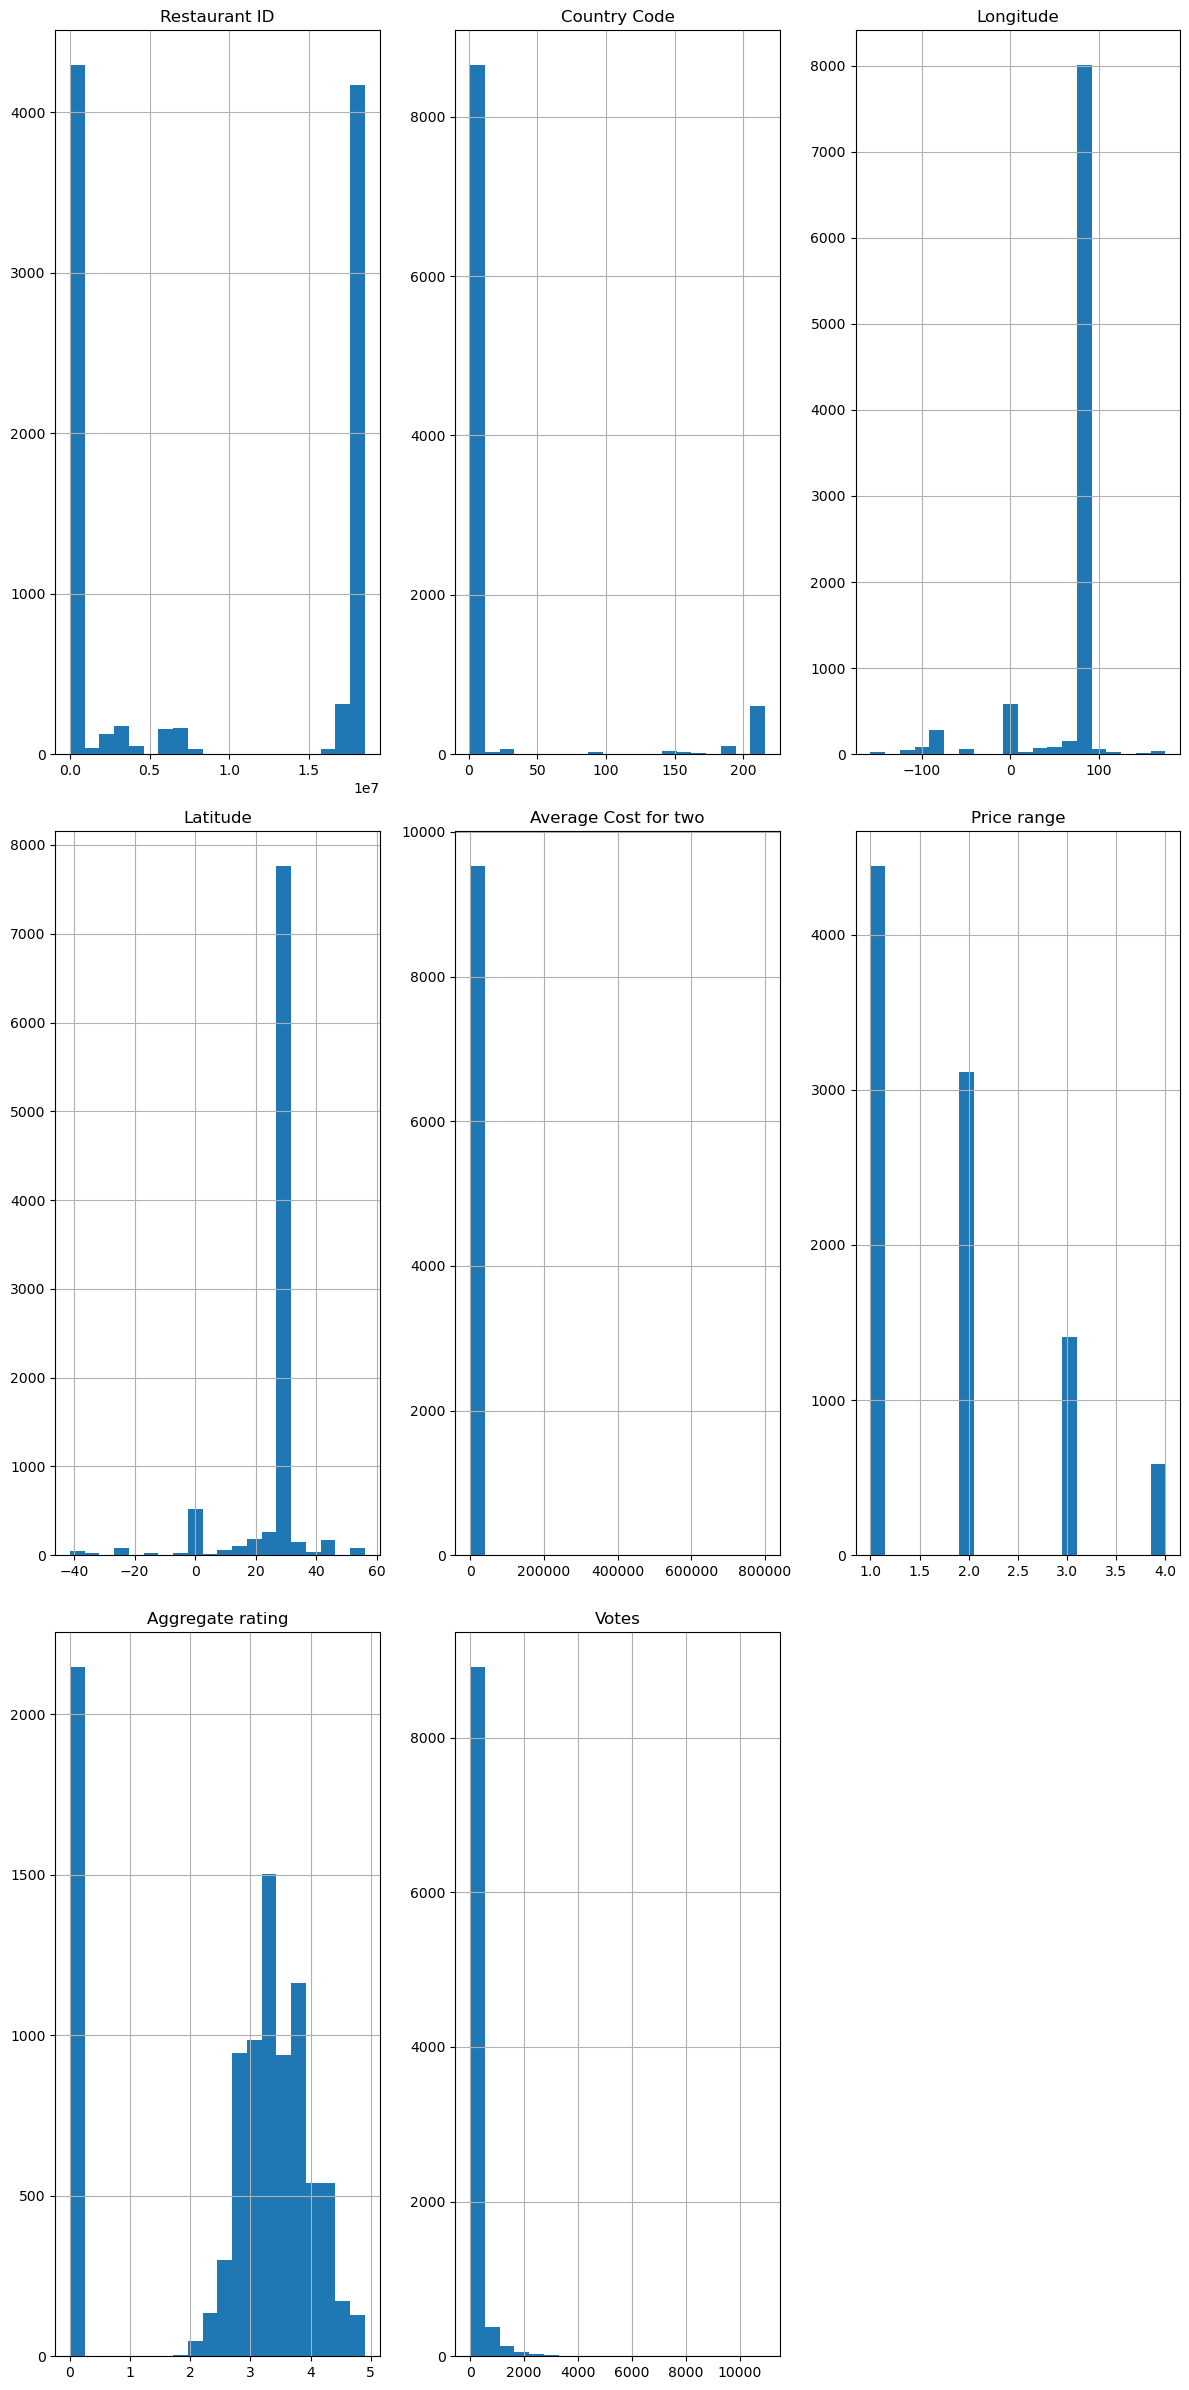

In [5]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print('Numeric columns:', num_cols)
print('Categorical columns:', cat_cols)

if len(num_cols)>0:
    df[num_cols].hist(figsize=(12, 3*len(num_cols)), bins=20)
    plt.tight_layout()
    plt.show()

In [6]:
for c in cat_cols:
    print('\n==', c, '==')
    print(df[c].value_counts(dropna=False).head(20))


== Restaurant Name ==
Cafe Coffee Day        83
Domino's Pizza         79
Subway                 63
Green Chick Chop       51
McDonald's             48
Keventers              34
Pizza Hut              30
Giani                  29
Baskin Robbins         28
Barbeque Nation        26
Giani's                22
Barista                22
Dunkin' Donuts         22
Costa Coffee           20
Pind Balluchi          20
Wah Ji Wah             19
Twenty Four Seven      19
Pizza Hut Delivery     19
Sagar Ratna            19
Republic of Chicken    18
Name: Restaurant Name, dtype: int64

== City ==
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
Bhubaneshwar        21
Amritsar            21
Ahmedabad           21
Lucknow             21
Guwahati            21
Ludhiana            20
Rest of Hawaii      20
Kochi               20
Kolkata             20
Pocatello           20
Pensacola           20
Mumbai              20
Mangalore         

In [7]:
candidate_cols = []
for c in df.columns:
    if df[c].nunique()<=10 and df[c].nunique()>1 and df[c].dtype in ['object','category','int64','float64']:
        if not any(k in c.lower() for k in ['id','address','phone','contact','url']):
            candidate_cols.append(c)
candidate_cols = list(dict.fromkeys(candidate_cols))

if len(candidate_cols)>0:
    target = candidate_cols[0]
    print('Selected target column (heuristic):', target)
else:
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    if len(numeric_cols)>0:
        var_col = max(numeric_cols, key=lambda x: df[x].var())
        target = 'target_bin'
        df[target] = (df[var_col] > df[var_col].median()).astype(int)
        print(f'No small-cardinality column found. Created binary target from numeric column "{var_col}" as "{target}".')
    else:
        raise ValueError('No suitable target column found. Please edit the notebook to choose a target manually.')

print('\nTarget value counts:')
print(df[target].value_counts())

Selected target column (heuristic): Has Table booking

Target value counts:
No     8393
Yes    1158
Name: Has Table booking, dtype: int64


In [8]:
target_col = target
X = df.drop(columns=[target_col])
y = df[target_col].copy()

num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print('Numeric features:', num_cols)
print('Categorical features:', cat_cols)

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

Numeric features: ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
Categorical features: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if len(y.unique())>1 else None)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (7640, 20) Test shape: (1911, 20)


In [11]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Test accuracy:', acc_rf)

Random Forest Test accuracy: 0.9377289377289377



Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.97      0.96      1679
         Yes       0.79      0.67      0.72       232

    accuracy                           0.94      1911
   macro avg       0.87      0.82      0.84      1911
weighted avg       0.93      0.94      0.94      1911



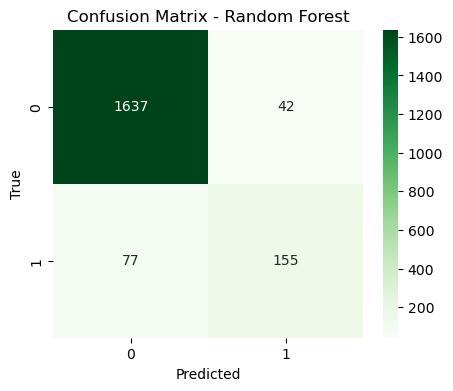

In [12]:
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
cm2 = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()